# Estatística - Probabilidade e Amostragem
# Desafio Final

Aluna: Maryllian de Albuquerque Vieira

Squad: Hedy Lamar

Considerando a base de dados de 'populacao_brasileira.json' responda as
questões abaixo (os dados são fictícios).

Você é uma pesquisadora desenvolvendo uma análise sobre as
características da **força de trabalho nos estados brasileiros**. Responda as
perguntas abaixo:

# Setup Inicial

In [ ]:
# Bibliotecas base
import pandas as pd
import numpy as np
# Bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
# Bibliotecas para estatística
import scipy.stats as stats

In [ ]:
# Criando df e visualização
df_populacao = pd.read_csv("/content/populacao_brasileira.csv.csv")
df_populacao.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


## Limpeza e transformações

Alterações necessárias antes da análise

In [ ]:
# Informações do df_populacao
df_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
# Dimensões
print(f"Linhas: {df_populacao.shape[0]}")
print(f"Colunas: {df_populacao.shape[1]}")

Linhas: 1000
Colunas: 7


In [ ]:
# Verficando valores nulos
df_populacao.isnull().sum()

,0
Unnamed: 0,0
estado,0
idade,0
escolaridade,0
nível de proficiência em inglês,0
renda,0
sexo,0


In [ ]:
df_populacao.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')

In [ ]:
# Criando cópia do df
df_populacao_bra = df_populacao.copy()

In [ ]:
# Renomeando colunas
df_populacao_bra.rename(columns={
    "Unnamed: 0" : "id",
    "nível de proficiência em inglês" : "proficiencia_ingles"
    }, inplace=True)

In [ ]:
df_populacao_bra.head()

,id,estado,idade,escolaridade,proficiencia_ingles,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
# Estatística descritivas das variáveis numéricas
df_populacao_bra.describe()

,id,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


In [ ]:
# Estatística descritiva das variáveis categóricas
df_populacao_bra.describe(include=["object"])

,estado,escolaridade,proficiencia_ingles,sexo
count,1000,1000,1000,1000
unique,27,4,3,2
top,AP,Fundamental,Avançado,F
freq,48,266,344,514


In [ ]:
# Contagem de categorias das variáveis 'objects'
for colum in df_populacao_bra.columns:
  if df_populacao_bra[colum].dtype == "object":
    print(f"\n{colum}:")
    print(df_populacao_bra[colum].value_counts())


estado:
estado
AP    48
RS    44
SC    43
ES    42
GO    42
RJ    42
PE    42
AL    41
CE    40
MG    39
MS    38
PA    38
AM    38
PB    37
AC    36
RR    36
RO    35
BA    35
TO    35
SP    34
MT    34
SE    34
RN    33
DF    32
PR    29
PI    28
MA    25
Name: count, dtype: int64

escolaridade:
escolaridade
Fundamental      266
Pós-graduação    253
Superior         243
Médio            238
Name: count, dtype: int64

proficiencia_ingles:
proficiencia_ingles
Avançado         344
Intermediário    329
Básico           327
Name: count, dtype: int64

sexo:
sexo
F    514
M    486
Name: count, dtype: int64


# Questão 01

1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.

k: número de sucessos desejados.

n: número total de tentativas.

p: probabilidade de sucesso em cada tentativa

In [ ]:
# Total da população
total_populacao = df_populacao_bra.shape[0]

# Total pessoas fluentes em inglês:
total_fluentes = df_populacao_bra[df_populacao_bra["proficiencia_ingles"] == "Avançado"].shape[0]

# Probabilidade de ser fluente
prob_fluente = total_fluentes / total_populacao

# Probabilidade de não ser fluente
prob_nao_fluente = (1 - prob_fluente)

print(f"Probabilidade Complementar, ou seja, escolhermos uma pessoa aleatória que não é fluente em inglês é de {round(prob_nao_fluente * 100,2)}%")

Probabilidade Complementar, ou seja, escolhermos uma pessoa aleatória que não é fluente em inglês é de 65.6%


# Questão 02

2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
# Probabilidade condicional
# Filtrando pessoas de AL e PA e identificando a quantidade
pessoas_AL_PA = df_populacao_bra[(df_populacao_bra['estado'] == 'AL') | (df_populacao_bra['estado'] == 'PA')]
total_AL_PA = len(pessoas_AL_PA)

# Pessoas com renda >5k
pessoas_AL_PA_renda_5 = pessoas_AL_PA[pessoas_AL_PA['renda'] > 5000]

# Probabilidade condicional
prob_AL_PA_renda_5 = len(pessoas_AL_PA_renda_5) / total_AL_PA

print(f"A probabilidade de uma pessoa escolhida aleatoriamente ser natural de Alagoas ou do Pará e ter uma renda superior a R$ 5.000,00 é de {prob_AL_PA_renda_5:.2%}")

A probabilidade de uma pessoa escolhida aleatoriamente ser natural de Alagoas ou do Pará e ter uma renda superior a R$ 5.000,00 é de 5.06%


# Questão 03

3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
# Amostra da população que é do Amazonas
df_AM = df_populacao_bra[(df_populacao_bra["estado"] == "AM")]

# Total de pessoas do AM
total_AM = df_AM.shape[0] # n= 38

# Total de pessoas do AM que tem 'ensino superior completo'
df_AM_ensino_superior = df_AM[(df_AM["escolaridade"] == "Superior") | (df_AM["escolaridade"] == "Pós-graduação")].shape[0] #n=21

# Probabilidade de pessoas do AM ter ensino superior completo
prob_AM_ensino_superior = df_AM_ensino_superior / total_AM

print(f"A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de {round(prob_AM_ensino_superior * 100,2)}%")

# Probabilidade da 5ª pessoa do AM ter ensino superior completo
prob_AL_PA_renda_5 = stats.geom.pmf(k=5, p=prob_AM_ensino_superior)

print(f"A probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo é de {round(prob_AL_PA_renda_5 * 100,2)}%")

A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de 55.26%
A probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo é de 2.21%


# Questão 04

4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [ ]:
# Densidade (Histograma)
# Intervalo
intervalo = 1500

# Faixas de renda
faixas_renda = np.arange(0, df_populacao_bra['renda'].max() + intervalo, intervalo)

# Contagem por faixa
contagem_por_faixa = pd.cut(df_populacao_bra['renda'], bins=faixas_renda).value_counts().sort_index()

# Identificando faixa predominante
faixa_predominante = np.argmax(contagem_por_faixa) * intervalo
print("Faixa de renda predominante:", faixa_predominante, "-", faixa_predominante + intervalo)



Faixa de renda predominante: 3000 - 4500


In [ ]:
# Imprimir o valor correspondente de pessoas por faixa
for faixa_renda, contagem in contagem_por_faixa.items():
    print(f"Faixa de renda: {faixa_renda}, Número de pessoas: {contagem}")

# Porcentagem de pessoas por faixa
porcentagem_por_faixa = contagem_por_faixa / contagem_por_faixa.sum() * 100
for faixa_renda, porcentagem in porcentagem_por_faixa.items():
    print(f"Faixa de renda: {faixa_renda}, Porcentagem de pessoas: {porcentagem:.2f}%")

Faixa de renda: (0.0, 1500.0], Número de pessoas: 55
Faixa de renda: (1500.0, 3000.0], Número de pessoas: 414
Faixa de renda: (3000.0, 4500.0], Número de pessoas: 442
Faixa de renda: (4500.0, 6000.0], Número de pessoas: 89
Faixa de renda: (0.0, 1500.0], Porcentagem de pessoas: 5.50%
Faixa de renda: (1500.0, 3000.0], Porcentagem de pessoas: 41.40%
Faixa de renda: (3000.0, 4500.0], Porcentagem de pessoas: 44.20%
Faixa de renda: (4500.0, 6000.0], Porcentagem de pessoas: 8.90%


In [ ]:
# Função de Densidade de Probabilidade = Porcentagem de pessoas / Largura da Faixa
densidade_probabilidade = (porcentagem_por_faixa / 100) / 1500
print("Função de Densidade de Probabilidade:")
for i, densidade in enumerate(densidade_probabilidade):
  print(f"Faixa {i + 1}: {densidade:.6f}")

Função de Densidade de Probabilidade:
Faixa 1: 0.000037
Faixa 2: 0.000276
Faixa 3: 0.000295
Faixa 4: 0.000059


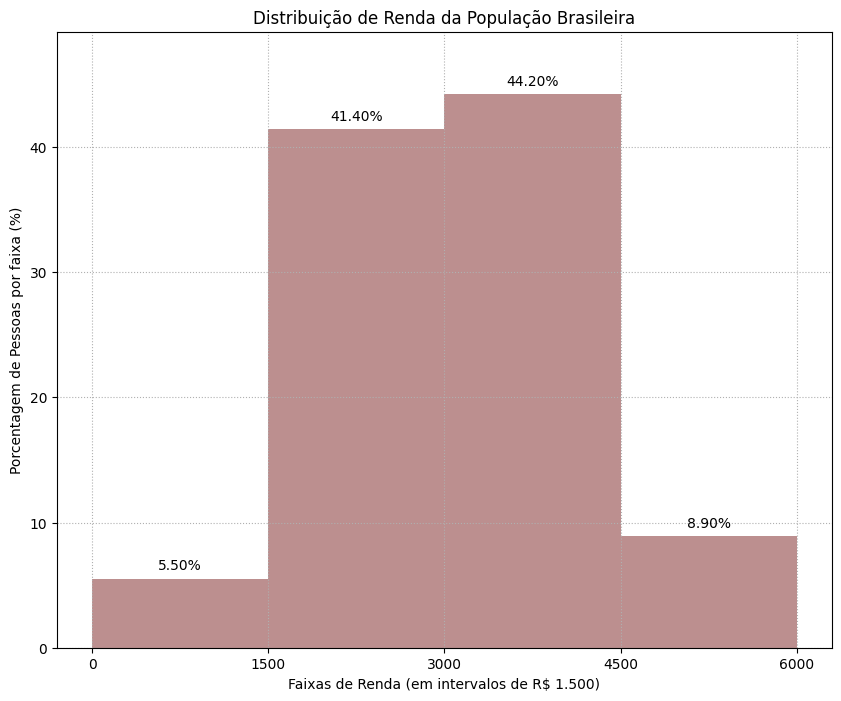

In [ ]:
# Plotagem do Histograma
plt.figure(figsize=(10, 8))
bars = plt.bar(faixas_renda[:-1], porcentagem_por_faixa, width=1500, align='edge', color='#BC8F8F')

# Personalização do gráfico
plt.xlabel('Faixas de Renda (em intervalos de R$ 1.500)')
plt.ylabel('Porcentagem de Pessoas por faixa (%)')
plt.title('Distribuição de Renda da População Brasileira')
plt.xticks(faixas_renda)
plt.ylim(0, max(porcentagem_por_faixa) + 5)

# Adicionando porcentagens nas barras
for bar, percent in zip(bars, porcentagem_por_faixa):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{percent:.2f}%', ha='center', va='bottom')

# Exibindo linhas de grade
plt.grid(linestyle=':')
#plt.tight_layout()
plt.show()

De acordo com o histograma de distribuição de densidade, a maior parte da população brasileira tem renda entre 3.000,00 e 4.500,00 reais. Que correponde à **44,2%** da população.

A **função de densidade de probabilidade** nos permite visualizar a probabilidade de uma pessoa ter uma renda dentro de um determinado intervalo.

No caso do intervalo de renda com maior percentual, possui uma **densidade de probabilidade de 0.000295**.


# Questão 05

5. Calcule a média e a variância da renda da amostra. Depois, faça a distribuição normal, inclua o gráfico.

In [ ]:
# Calculando média, variância e desvio padrão de renda
media_renda = np.mean(df_populacao_bra['renda'])
variancia_renda = np.var(df_populacao_bra['renda'])

# Imprimindo resultados
print(f"Média da renda: R${media_renda:.2f}")
print(f"Variância da renda: {variancia_renda:.2f}")

Média da renda: R$3082.54
Variância da renda: 992163.07


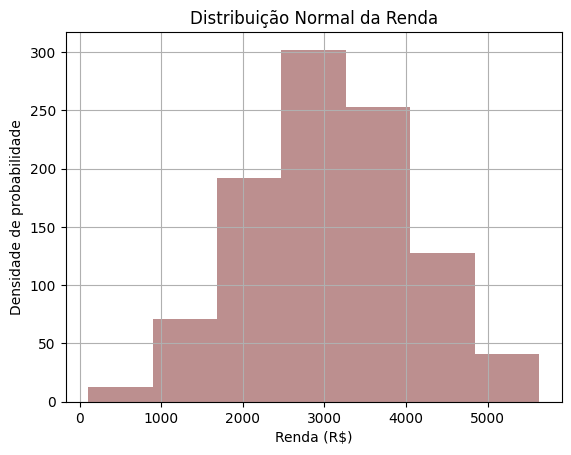

In [ ]:
# Histrograma de Distribuição Normal
plt.hist(df_populacao_bra['renda'], bins=7, color='#BC8F8F')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de probabilidade')
plt.title('Distribuição Normal da Renda')
plt.grid(True)
plt.show()


# Questão 06

6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
# População total
total_populacao = df_populacao_bra.shape[0]

# População com pós graduação
pessoas_pos_graduacao = df_populacao_bra[df_populacao_bra["escolaridade"] == "Pós-graduação"].shape[0]

# Probabilidade de encontrar uma pessoa com pós-graduação
p_pos_graduacao = pessoas_pos_graduacao / total_populacao
print(p_pos_graduacao)

0.253


In [ ]:
# Considerando 1 milhão de habitantes e número de sucessos desejados
n = 1000000
k = 243000
prob_pos_graduacao = stats.binom.pmf(k,n,p_pos_graduacao)
print(f"A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes é de {prob_pos_graduacao}")

A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes é de 1.1104854289794913e-119


# Questão 7

7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
# População total
total_populacao = df_populacao_bra.shape[0]

# Total de pessoas por escolaridade
total_escolaridade = df_populacao_bra['escolaridade'].value_counts().sort_index()

# Probabilidade acumulada por escolaridade
prob_acumulada_escolaridade = total_escolaridade / total_populacao
print(f"Função de Densidade Acumulada Discreta por nível de escolaridade:\n{prob_acumulada_escolaridade}")

Função de Densidade Acumulada Discreta por nível de escolaridade:
escolaridade
Fundamental      0.266
Médio            0.238
Pós-graduação    0.253
Superior         0.243
Name: count, dtype: float64


# Questão 08

Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [ ]:
# Total da população
total_populacao = df_populacao_bra.shape[0]

# Total de pessoas com nível de inglês intermediário
total_ingles_intermediario = df_populacao_bra[df_populacao_bra['proficiencia_ingles'] == 'Intermediário'].shape[0]

# Probabilidade de ter nível intermediário
prob_ingles_intermediario = total_ingles_intermediario / total_populacao

# Probabilidade Complementar
prob_nao_ingles_intermediario = (1 - prob_ingles_intermediario)

# Margem de erro amostral - Fórmula: Z * np.sqrt((p * (1 - p)) / n)
confianca = 0.95
Z = stats.norm.ppf(1 - (1 - confianca) / 2)
margem_erro = Z * np.sqrt((prob_ingles_intermediario * prob_nao_ingles_intermediario) / total_populacao)

# Intervalo de Confiança
intervalo_inferior = prob_ingles_intermediario - margem_erro
intervalo_superior = prob_ingles_intermediario + margem_erro

# Imprimindo resultados

print(f"Probabilidade de ter nível intermediário: {prob_ingles_intermediario:.2%}")
print(f"Margem de erro amostral: {margem_erro:.2f}")
print(f"Intervalo de confiança: {intervalo_inferior:.2f} a {intervalo_superior:.2f}")

Probabilidade de ter nível intermediário: 32.90%
Margem de erro amostral: 0.03
Intervalo de confiança: 0.30 a 0.36


# Questão 09

9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
# Média de renda da população
media_renda = np.mean(df_populacao_bra['renda'])

# Renda esperada
renda_esperada = media_renda + 1000
print(f"Média de renda da população: R${media_renda:.2f}")

# Total de pessoas com a renda mil reais acima da média
total_acima_media = df_populacao_bra[df_populacao_bra['renda'] > renda_esperada].shape[0]
print(f"Pessoas com a renda mil reais acima da média: {total_acima_media}")

# Probabilidade de uma pessoa ter renda mil > média
prob_acima_media = total_acima_media / total_populacao
print(f"Probabilidade de uma pessoa ter renda mil reais acima da média: {prob_acima_media}")

Média de renda da população: R$3082.54
Pessoas com a renda mil reais acima da média: 161
Probabilidade de uma pessoa ter renda mil reais acima da média: 0.161


In [ ]:
# Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média
n = total_populacao
k = 60
p = prob_acima_media

prob_60_acima_media = stats.binom.pmf(k, n, p)
print(f"A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é de {prob_60_acima_media}")

A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é de 1.099520565163774e-22


# Questão 10

10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2mil reais por mês?

In [ ]:
# Total de pessoas
total_populacao = df_populacao_bra.shape[0]

# Condições = sudeste, homem, enisno fundamental e renda >2mil
condicoes = df_populacao_bra[(df_populacao_bra['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) &
                             (df_populacao_bra['sexo'] == 'M') &
                             (df_populacao_bra['escolaridade'] == 'Fundamental') &
                             (df_populacao_bra['renda'] > 2000)].shape[0]


# Probabilidade de encontrar alguém dentro dessas condições
probabilidade = condicoes / total_populacao
print(f"A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2mil reais por mês é de {probabilidade}")

A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2mil reais por mês é de 0.019
